In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Dec  3 16:34:39 2024

@author: gruffalo
"""

# %% Set working directory
import os
os.chdir(r'/home/pinky/Documents/PrgGithub/Ella/Python/data_SophieBagur')

from load_save_results import ( 
    load_results
    )
from joblib import load
from preprocess_sort_data import (
    rebin_mice_data
    )
from analyse_data import (
    spike_count_all_mice,
    )
from plot_results_linear_nonlinear_model import (
    extract_r2_values,
    plot_r2_means_sem,
    plot_mean_firing_rate_vs_r2,
    plot_r2_comparison
    )
from analyse_ln_results import (
    filter_neurons_by_mean_firing_rate
    )
from save_plots import (
    save_plot_as_svg
    )

Data loaded successfully from /media/DataMOBsRAIDN/ProjectEmbReact/Data_ella/maze_denoised_data.pkl.
Data loaded successfully from /media/DataMOBsRAIDN/ProjectEmbReact/Data_ella/maze_spike_times_data.pkl.


/home/pinky/anaconda3/envs/sophie_basic/lib/python3.13/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pinky/anaconda3/envs/sophie_basic/lib/python3.13/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.6.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


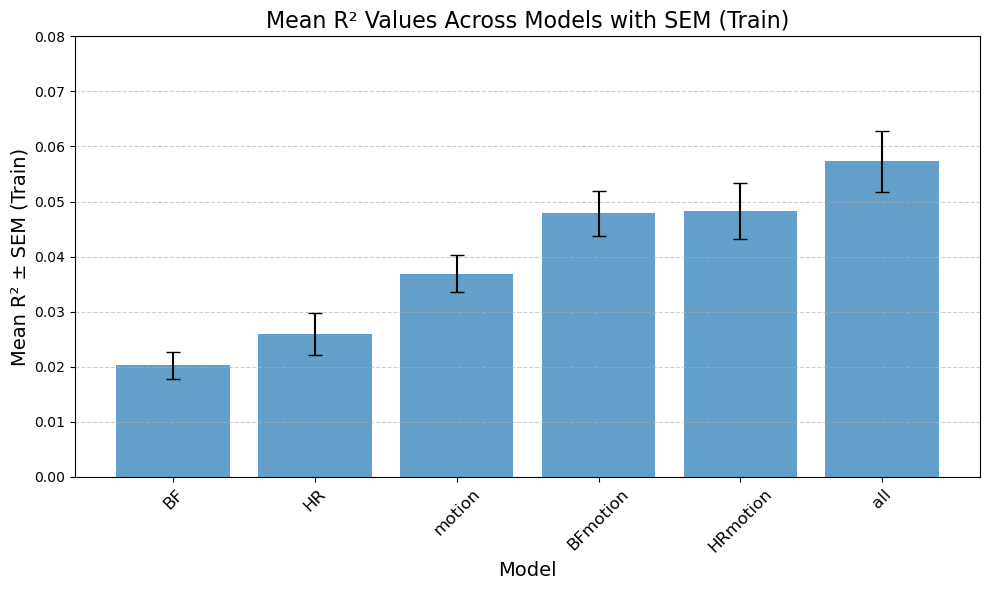

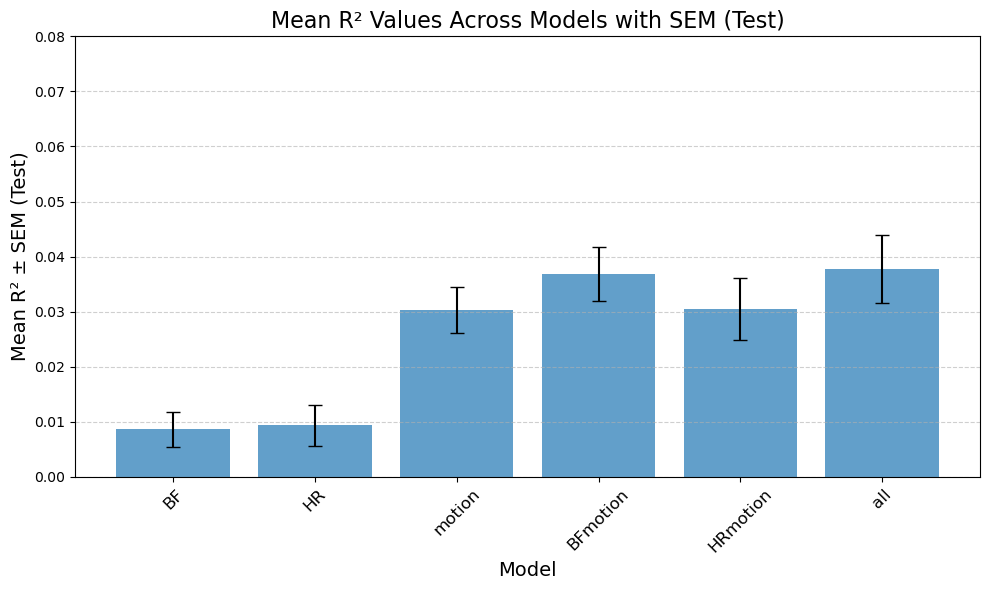

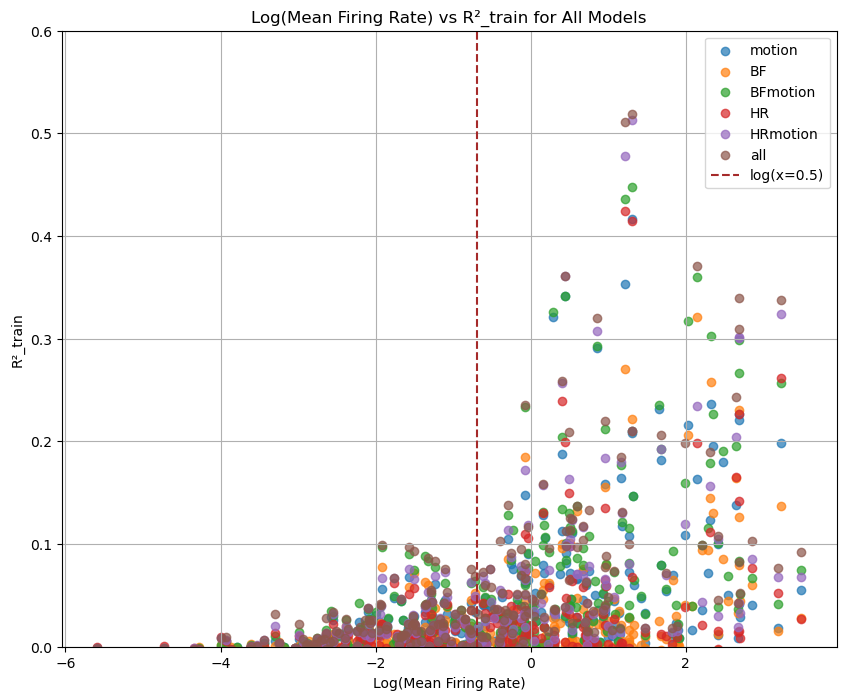

222


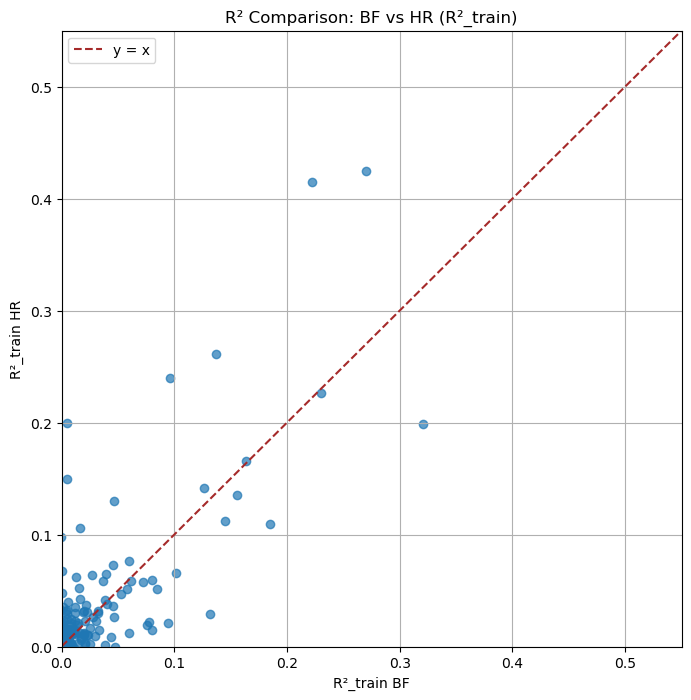

317


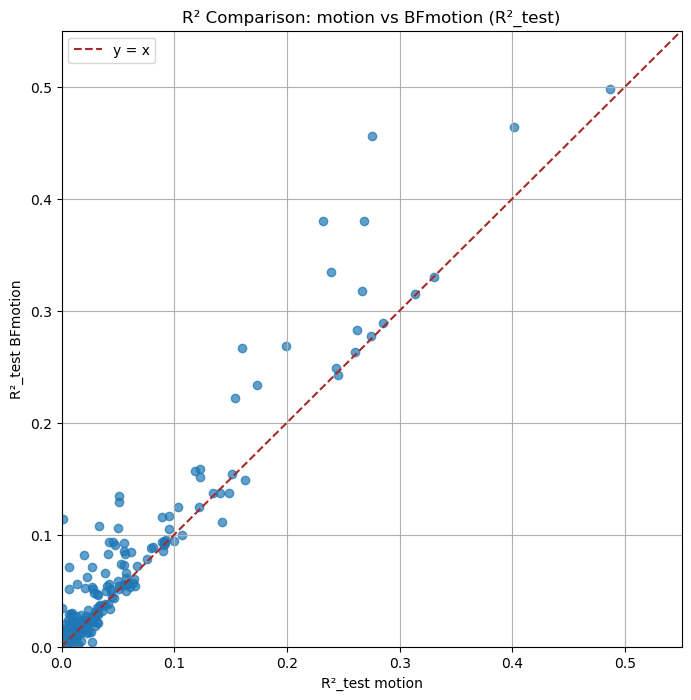

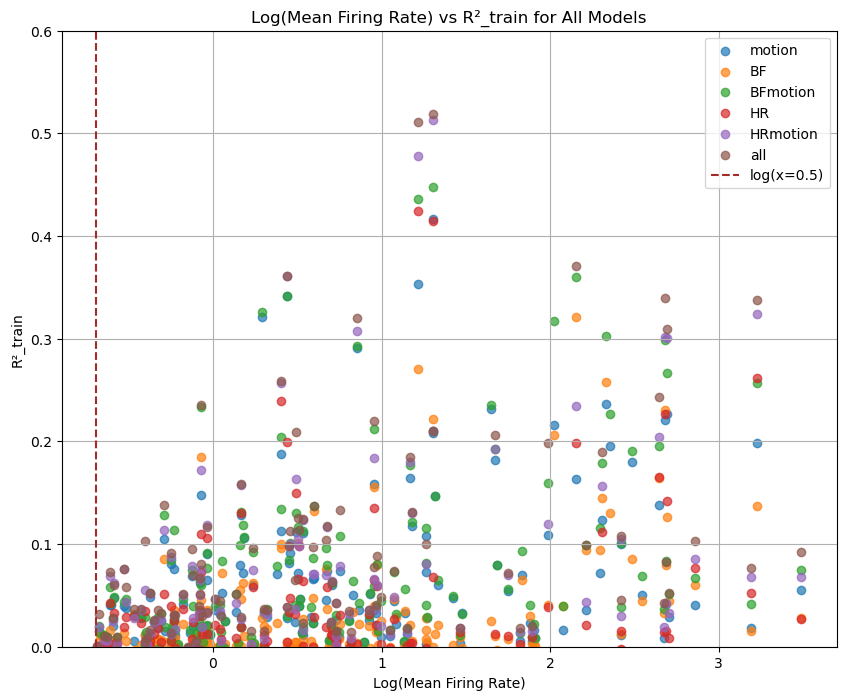

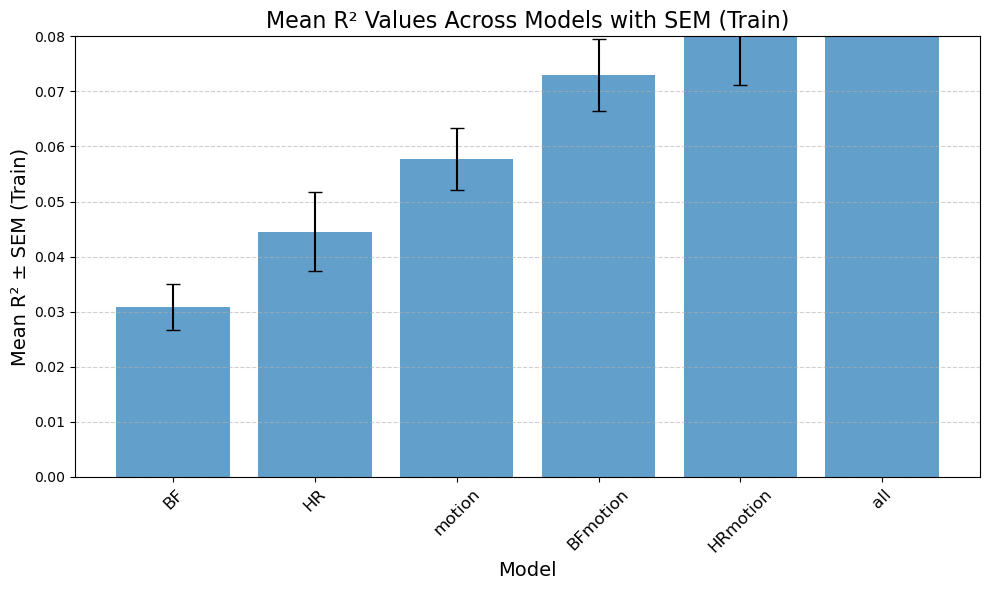

110


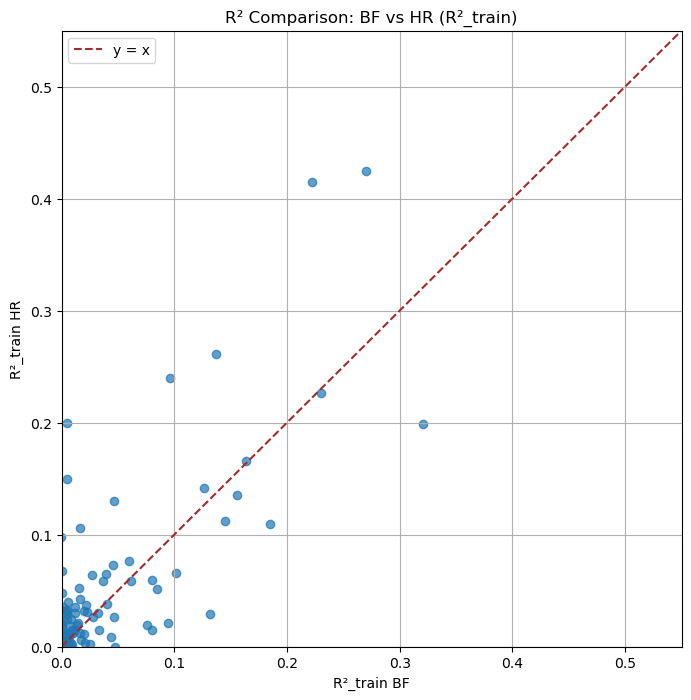

110


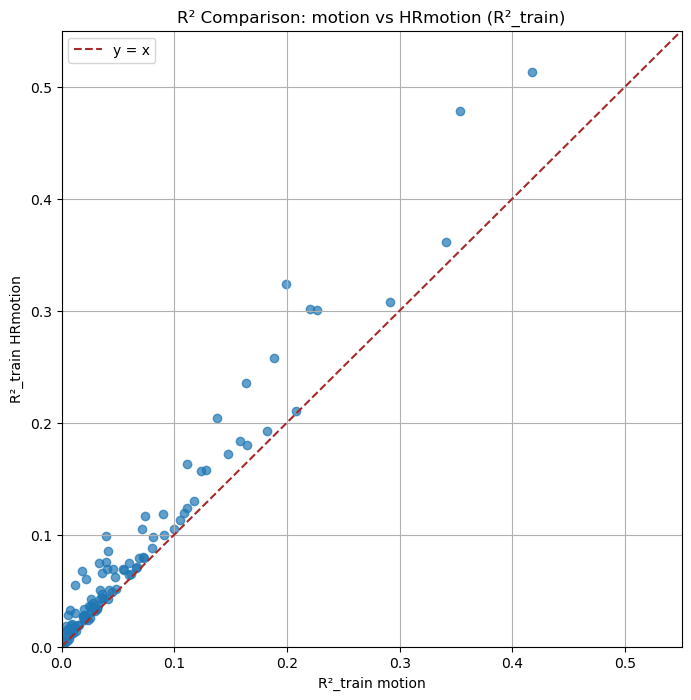

In [3]:
# %% Load data

load_path = r'/media/DataMOBsRAIDN/ProjectEmbReact/Data_ella/'
figures_directory = load_path + 'figures/linear_nonlinear_model'

maze_denoised_data = load_results(load_path + 'maze_denoised_data.pkl')
maze_spike_times_data = load_results(load_path + 'maze_spike_times_data.pkl')

# Rebin data
new_bin_size = 0.6
maze_rebinned_data = rebin_mice_data(maze_denoised_data, ['BreathFreq', 'Heartrate', 'Accelero', 'Speed', 'LinPos'], new_bin_size)

# Compute spike counts
spike_counts = spike_count_all_mice(maze_rebinned_data, maze_spike_times_data)


# %% Load results

# results_ln_loaded = load_results(load_path + 'results_ln_model.pkl')
results_ln_loaded = load(load_path + 'all_results_ln_model_rs30.joblib')


# %% R2

r2_dataframe = extract_r2_values(results_ln_loaded)

r2_train_bp = plot_r2_means_sem(results_ln_loaded, r2_type='train')
r2_test_bp = plot_r2_means_sem(results_ln_loaded, r2_type='test')
# plot_r2_means_sem(results_ln_loaded_bis, r2_type='test')

plot_mean_firing_rate_vs_r2(results_ln_loaded, spike_counts, separate_subplots=False, r2_type='train')

plot_r2_comparison(results_ln_loaded, model_1='BF', model_2='HR', r2_type = 'train')
plot_r2_comparison(results_ln_loaded, model_1='motion', model_2='BFmotion', r2_type='test')


# save_plot_as_svg(figures_directory, 'r2_train_bp', r2_train_bp)
# save_plot_as_svg(figures_directory, 'r2_test_bp', r2_test_bp)


# %% Sort neurons according to firing rate

threshold = 0.5

# Filter neurons with mean firing rate >= threshold
results_filtered = filter_neurons_by_mean_firing_rate(
    loaded_results=results_ln_loaded,
    spike_counts=spike_counts,
    firing_rate_threshold=threshold,
    above_threshold=True
)

plot_mean_firing_rate_vs_r2(results_filtered, spike_counts, separate_subplots=False, r2_type='train')


plot_r2_means_sem(results_filtered, r2_type='train')

plot_r2_comparison(results_filtered, model_1='BF', model_2='HR', r2_type='train')
plot_r2_comparison(results_filtered, model_1='motion', model_2='HRmotion', r2_type='train')

In [7]:
r2_dataframe

r2_dataframe.to_csv('r2_lin_nonlin.csv', index=False) 